# SFML Project

Ward Gauderis - 0588485
Fabian Denoodt - TODO

Master Computer Science in Artificial Intelligence - Vrije Universiteit Brussel

## Introduction

1. What is the influence of noise in the training data on the in- and out-of-sample error and how does regularization counter this?
2. b
3. c

#### Initialization

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

cmap = plt.cm.RdBu_r


def scales(X, ax):
    length_x = X[:, 0].max() - X[:, 0].min()
    length_y = X[:, 1].max() - X[:, 1].min()
    x_min, x_max = X[:, 0].min() - length_x / 8, X[:, 0].max() + length_x / 8
    y_min, y_max = X[:, 1].min() - length_y / 8, X[:, 1].max() + length_y / 8

    x_min = -2
    x_max = 2
    y_min = -2
    y_max = 2

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_aspect("equal")

    return x_min, x_max, y_min, y_max


def plot_points(X, y, ax):
    scales(X, ax)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s=20)


def plot_decision_boundaries(X, y, ax: plt.Axes, model: MLPClassifier, resolution=0.02, decision=False):
    x_min, x_max, y_min, y_max = scales(X, ax)

    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))
    if decision:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, cmap=cmap, s=2)

    return ax

## Research Question 1

Data noise & label noise

<AxesSubplot:>

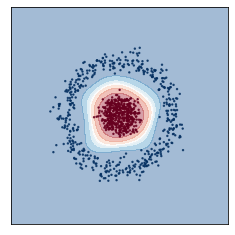

In [2]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2)

model = MLPClassifier(activation="tanh", solver="adam", hidden_layer_sizes=(10,),
                      max_iter=10000, random_state=0, verbose=False)
model.fit(X, y)
plot_decision_boundaries(X, y, plt.subplot(), model)

In [3]:
models = []
alphas = np.linspace(0, 1, 13)
for alpha in alphas:
    models.append(
        (make_pipeline(StandardScaler(), MLPClassifier(
            activation="relu",
            hidden_layer_sizes=(10,),
            max_iter=1000,
            random_state=0,
            alpha=alpha
        )), alpha)
    )

In [4]:
datasets = []
noises = np.linspace(0, 1, 13)
for noise in noises:
    datasets.append((make_circles(500, random_state=0, noise=noise, factor=0.2), noise))

/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


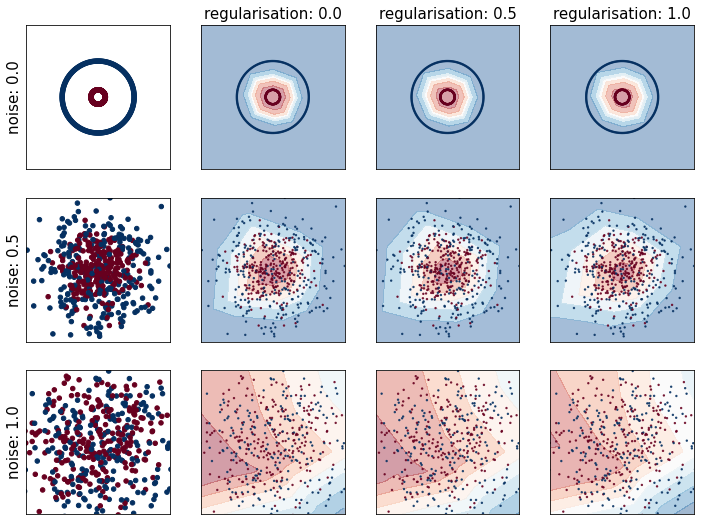

In [5]:
k = 6

i = 1
plt.figure(figsize=((len(datasets) // k + 2) * 3, ((len(models)) // k + 1) * 3))
train_scores = []
test_scores = []
for a, ((X, y), noise) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    if a % k == 0:
        ax: plt.Axes = plt.subplot(len(datasets) // k + 1, len(models) // k + 2, i)
        i += 1
        plot_points(X, y, ax)
        ax.set_ylabel(f"noise: {noise}", fontsize=15)

    for b, (model, alpha) in enumerate(models):
        print(f"{a}/{len(datasets)} {b}/{len(models)}", end="\r")
        model.fit(X_train, y_train)
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))

        if a % k == 0 and b % k == 0:
            ax: plt.Axes = plt.subplot(len(datasets) // k + 1, len(models) // k + 2, i)
            plot_decision_boundaries(X, y, ax, model)
            if a == 0:
                ax.set_title(f"regularisation: {alpha}", fontsize=15)
            i += 1

plt.show()

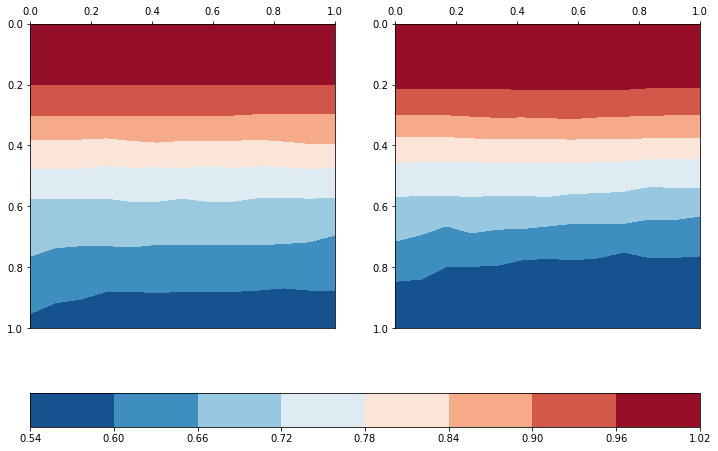

In [6]:
xx, yy = np.meshgrid(alphas, noises)

plt.figure(figsize=(3 * 4, 2 * 4))
i = 1
for data in [test_scores, train_scores]:
    ax: plt.Axes = plt.subplot(1, 2, i)
    c = ax.contourf(xx, yy, np.reshape(data, xx.shape), cmap=cmap)
    ax.set_aspect("equal")
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    i += 1

plt.colorbar(c, ax=plt.gcf().axes, orientation="horizontal")
plt.show()

## Research Question 2


## Research Question 3

## Conclusion

## Introduction

1. What is the influence of noise in the training data on the in- and out-of-sample error and how does regularization counter this?
2. b
3. c

#### Initialization

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

cmap = plt.cm.RdBu_r


def scales(X, ax):
    length_x = X[:, 0].max() - X[:, 0].min()
    length_y = X[:, 1].max() - X[:, 1].min()
    x_min, x_max = X[:, 0].min() - length_x / 8, X[:, 0].max() + length_x / 8
    y_min, y_max = X[:, 1].min() - length_y / 8, X[:, 1].max() + length_y / 8

    x_min = -2
    x_max = 2
    y_min = -2
    y_max = 2

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_aspect("equal")

    return x_min, x_max, y_min, y_max


def plot_points(X, y, ax):
    scales(X, ax)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s=20)


def plot_decision_boundaries(X, y, ax: plt.Axes, model: MLPClassifier, resolution=0.02, decision=False):
    x_min, x_max, y_min, y_max = scales(X, ax)

    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))
    if decision:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, cmap=cmap, s=2)

    return ax

## Research Question 1

Data noise & label noise

<AxesSubplot:>

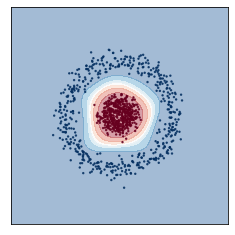

In [3]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2)

model = MLPClassifier(activation="tanh", solver="adam", hidden_layer_sizes=(10,),
                      max_iter=10000, random_state=0, verbose=False)
model.fit(X, y)
plot_decision_boundaries(X, y, plt.subplot(), model)

In [4]:
models = []
alphas = np.linspace(0, 1, 13)
for alpha in alphas:
    models.append(
        (make_pipeline(StandardScaler(), MLPClassifier(
            activation="relu",
            hidden_layer_sizes=(10,),
            max_iter=1000,
            random_state=0,
            alpha=alpha
        )), alpha)
    )

In [5]:
datasets = []
noises = np.linspace(0, 1, 13)
for noise in noises:
    datasets.append((make_circles(500, random_state=0, noise=noise, factor=0.2), noise))

/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


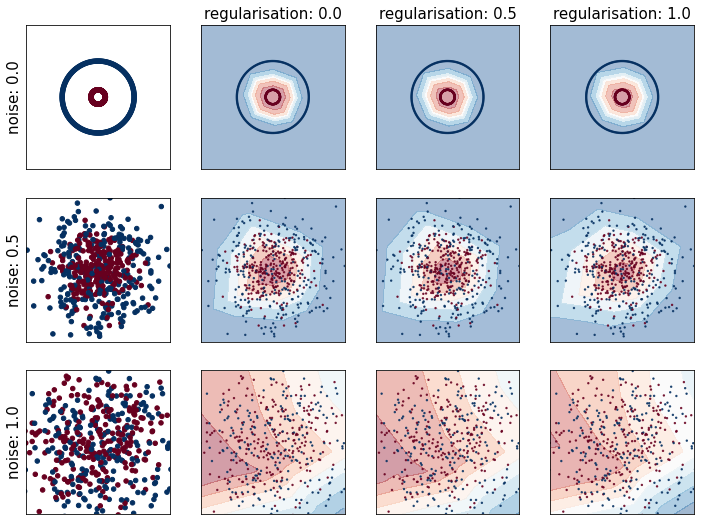

In [6]:
k = 6

i = 1
plt.figure(figsize=((len(datasets) // k + 2) * 3, ((len(models)) // k + 1) * 3))
train_scores = []
test_scores = []
for a, ((X, y), noise) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    if a % k == 0:
        ax: plt.Axes = plt.subplot(len(datasets) // k + 1, len(models) // k + 2, i)
        i += 1
        plot_points(X, y, ax)
        ax.set_ylabel(f"noise: {noise}", fontsize=15)

    for b, (model, alpha) in enumerate(models):
        print(f"{a}/{len(datasets)} {b}/{len(models)}", end="\r")
        model.fit(X_train, y_train)
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))

        if a % k == 0 and b % k == 0:
            ax: plt.Axes = plt.subplot(len(datasets) // k + 1, len(models) // k + 2, i)
            plot_decision_boundaries(X, y, ax, model)
            if a == 0:
                ax.set_title(f"regularisation: {alpha}", fontsize=15)
            i += 1

plt.show()

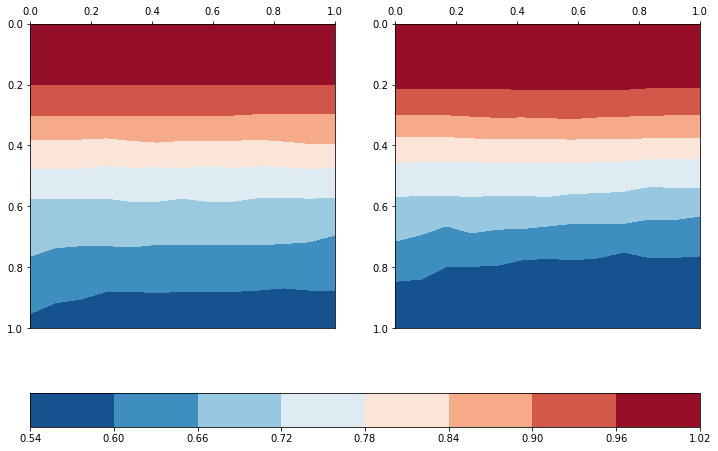

In [7]:
xx, yy = np.meshgrid(alphas, noises)

plt.figure(figsize=(3 * 4, 2 * 4))
i = 1
for data in [test_scores, train_scores]:
    ax: plt.Axes = plt.subplot(1, 2, i)
    c = ax.contourf(xx, yy, np.reshape(data, xx.shape), cmap=cmap)
    ax.set_aspect("equal")
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    i += 1

plt.colorbar(c, ax=plt.gcf().axes, orientation="horizontal")
plt.show()

## Research Question 2


## Research Question 3

## Conclusion